In [1]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from termcolor import colored

### 1.(40pts) Define functions

In [2]:
# One hot Encoding the categorical output values to binary by adding 1's for that index and 0's otherwise
def oneHotEncode(y):
#     print('Before Encoding ')
#     print(y)
#     print(type(y))
    enc = pd.get_dummies(y['y'])
#     print('After Encoding ')
#     print(enc)
    return np.matrix(enc)

# Applying Sigmoid Activation function to the hidden layer outputs used while forward propagation
# works with scalar, arrays and matrix as well
# Purpose of this method is to do squishing on the linear function
def apply_sigmoid(z):
    return 1./(1+np.exp(-z))

# Applying Sigmoid Activation function to the hidden layer outputs used while backward propagation to get gradients
# works with scalar, arrays and matrix as well
# Purpose of this method is to do undo the squishing on the linear function
def apply_sigmoid_prime(z):
#     print('Before')
#     print(z)
    #inv = np.dot(z.T, (1-z))
    inv = (np.exp(-z))/(np.power((1+np.exp(-z)),2))
#     print('After')
#     print(inv)
    return inv


# Forward propagation to calculate yHat by applying activation function twice
def forward_propagate(X, W1, W2, b1, b2):
    Z1 = np.dot(W1, X) + b1
#     print('----Z1----')
#     print(Z1)
    A1 = apply_sigmoid(Z1)
#     print('----A1----')
#     print(A1)
#     print('----W2----')
#     print(W2)
    Z2 = np.dot(W2, A1) + b2
#     print('----Z2----')
#     print(Z2)
    A2 = apply_sigmoid(Z2) # Output of the last layer(output layer)
#     print('----A2----')
#     print(A2)
    return A1, A2, Z1, Z2

# Backward Propagation function to calculate the gradients
def back_propagate(Z1, X, Y, A1, A2, W2):
    m = X.shape[1]
#     print(m)
#     print('----Y----')
#     print(Y)
#     print('----A2----')
#     print(A2)
    dZ2 = A2 - Y
#     print('----dz2----')
#     print(dZ2)
#     print(type(dZ2))
#     print('----A1T----')
#     print(A1.T)
    dW2 = (1./m) * np.dot(dZ2, A1.T)
#     print('----dw2----')
#     print(dW2)
    db2 = (1./m) * np.sum(dZ2, axis=1)
#     print('----db2----')
#     print(db2)
    temp1 = np.dot( W2.T, dZ2 )
    temp2 = apply_sigmoid_prime(Z1)
#     print('----temp1----')
#     print(temp1)
#     print('----temp2----')
#     print(temp2)
    dZ1 = np.multiply(temp1 , temp2) # element wise product of same dimension matrices
#     print('----dz1----')
#     print(dZ1)
    dW1 = (1./m) * np.dot(dZ1, X.T)
#     print('----dw1----')
#     print(dW1)
    db1 = (1./m) * np.sum(dZ1, axis =1)
#     print('----db1----')
#     print(db1)
    return dW1, db1, dW2, db2
    
# Get the loss of for the training example
def get_cost(Y, Yhat):
    m= Y.shape[1]
#     print(m)
    loss = np.multiply(np.log(Yhat),Y) + np.multiply((1.-Y), np.log(1. - Yhat))
#     print(loss)
    loss = np.sum(loss)
    #print('loss is ' + str(loss))
    cost = -1./m * np.sum(loss)
    cost = np.squeeze(cost)
    return cost

def gradientDescent(X, Y, YOrg, alpha, iters, hidden, inp, output):  
    # Call Forward propagation to calculate yHat
    W1, W2, b1, b2 = initialize_parameters(hidden, inp, output)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    dW1 = None
    db1 = None
    dW2 = None
    db2 = None
    cost_history = []
    for i in range(iters):
        A1, A2, Z1, Z2 = forward_propagate(X, W1, W2, b1, b2)
        old_cost = new_cost
        new_cost = get_cost(Y, A2)
        dW1, db1, dW2, db2 = back_propagate(Z1, X, Y, A1, A2, W2)
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        if(abs(old_cost - new_cost) < 0.00000000001):
            print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost) + " Old cost : " + str(old_cost) + " Iteration: " + str(i))
        cost_history.append(new_cost)
    A2 = softmax(A2)
    accuracy = get_accuracy(YOrg, A2)
    return W1 , b1, W2, b2, cost_history, new_cost, accuracy

# Softmax activation function to get the probablity of the classes
def softmax(z):
    softMax = (np.exp(z) / np.sum(np.exp(z),axis=0))
    softMax = np.matrix(np.argmax(softMax,axis=0)).T
    return softMax

def plotCostHistory(cost_history, alpha, i):
     line = plt.plot(cost_history, label=alpha)
     plt.ylabel('Cost');
     plt.xlabel('Iterations');
     plt.title('Cost Progression with Iterations for different learning rates')
     plt.legend()
        
def get_accuracy(Y, Ypred):
    Y = np.matrix(Y)
    numcorrect = 0
    for (x,y) in zip(Ypred,Y):
        if(x[0]==y[0]):
            numcorrect+=1
    accuracy=numcorrect*100.0/len(Y)
    return accuracy

### 2. (5pts) Split data

In [3]:
# Reading the training data
data_train = pd.read_csv('ex3_train.csv', sep=",", encoding='utf-8', header='infer')
df_train = data_train
m = df_train.shape[0]

y_train = pd.DataFrame(df_train['y'])
X_train = df_train.drop(['y'], axis=1)

X_train_mat = np.matrix(X_train).T
y_train_mat = oneHotEncode(y_train).T

In [4]:
# Reading the test data
data_test = pd.read_csv('ex3_test.csv', sep=",", encoding='utf-8', header='infer')
df_test = data_test

y_test = pd.DataFrame(df_test['y'])
X_test = df_test.drop(['y'], axis=1)

X_test_mat = np.matrix(X_test).T
y_test_mat = oneHotEncode(y_test).T

# Plot the selected pixel
# num = 7
# pixels = np.array(X_test[num:num+1], dtype='uint8')
# print(y_test[num:num+1])
# pixels = pixels.reshape((20, 20))
# plt.imshow(pixels, cmap='gray')
# plt.show()

### 3. (5pts) Initialize parameters

In [5]:
# Initialize weights
np.random.seed(1) # Setting random seed to 1
def initialize_parameters(hiddenLayerSize, inputLayerSize, outputLayerSize):
    W1 = np.random.randn(hiddenLayerSize, inputLayerSize) * 0.01;
    W2 = np.random.randn(outputLayerSize, hiddenLayerSize) * 0.01;
    b1 = np.zeros((hiddenLayerSize,1));
    b2 = np.zeros((outputLayerSize,1));
    return W1, W2, b1, b2

### 4. (20pts) Neural Network model with 1 hidden layer

In [6]:
# Defining Hyperparameters
inputLayerSize = X_train_mat.shape[0]
hiddenLayerSize = 25 # As specified in assignment requirements
outputLayerSize = 10
print('Input Layer Size is ' + str(inputLayerSize))
print('Hidden Layer Size is ' + str(hiddenLayerSize))
print('Output Layer Size is ' + str(outputLayerSize))

Input Layer Size is 400
Hidden Layer Size is 25
Output Layer Size is 10


### 5. (10pts) Predictions 
### 6. (20pts) Optimization

In [7]:
# Optimization function to check cost propagartion for different learning rates
def optimize():
    alpha = [1, 0.1, 0.001, 0.0001]
    i=0
    scores = pd.DataFrame(columns=['alpha','W1', 'b1', 'W2', 'b2','accuracy'])
    print(colored('*****************Training Data*********************', 'red'))
    for a in alpha:
        W1 , b1, W2, b2, cost_history, new_cost, acc = gradientDescent(X_train_mat, y_train_mat, 
                                                            y_train, a, 4500, hiddenLayerSize, inputLayerSize, outputLayerSize)
        scores.loc[i] = pd.Series({'alpha':a, 'accuracy':acc, 'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2})
        print("Cost with " + colored("Alpha " + str(a),'green') + " is " + str(new_cost) + " & " + colored("Accuracy is " + str(acc), 'green'))
        plotCostHistory(cost_history, a, i)
        i+=1
    least_cost_comb = scores['accuracy'].idxmax()
    alph = scores.iloc[[least_cost_comb]]['alpha'][least_cost_comb]
    W1 = scores.iloc[[least_cost_comb]]['W1'][least_cost_comb]
    b1 = scores.iloc[[least_cost_comb]]['b1'][least_cost_comb]
    W2 = scores.iloc[[least_cost_comb]]['W2'][least_cost_comb]
    b2 = scores.iloc[[least_cost_comb]]['b2'][least_cost_comb]
    plt.show()
    return W1 , b1, W2, b2, alph

*****************Training Data*********************
Cost with Alpha 1 is 0.0643133427923 & Accuracy is 99.7714285714
Cost with Alpha 0.1 is 0.502851353092 & Accuracy is 93.2571428571
Cost with Alpha 0.001 is 3.25405150734 & Accuracy is 10.2
Cost with Alpha 0.0001 is 4.15658149194 & Accuracy is 9.57142857143


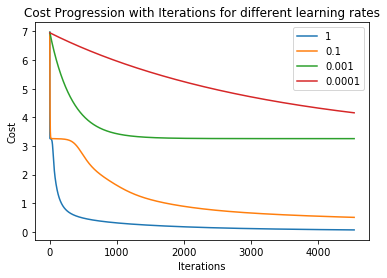

In [8]:
# Get the best combination of weights and alpha
W1 , b1, W2, b2, alph = optimize()

In [9]:
A1, A2, Z1, Z2 = forward_propagate(X_test_mat, W1, W2, b1, b2)
A2 = softmax(A2)
acc = get_accuracy(y_test, A2)
print(colored('*****************Test Data************************', 'red'))
print(colored('Test Data Optimized accuracy is ' + str(acc), 'green'))

*****************Test Data************************
Test Data Optimized accuracy is 92.6


In [10]:
print(alph)

1
